In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
beer_advocate = pd.read_csv('Final/beer_advocate.csv')
rate_beer = pd.read_csv('Final/rate_beer.csv')
print(beer_advocate.shape)
print(rate_beer.shape)

(11043, 18)
(12559, 17)


In [4]:
#We filter the columns for better visualization
rate_beer_df = rate_beer[['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style', 'nbr_ratings', 'avg', 'dates', 'location', 'name']]
beer_advocate_df = beer_advocate[['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style', 'nbr_ratings', 'avg', 'dates', 'location', 'name']]

In [5]:
rate_beer = rate_beer_df.set_index(["brewery_id", "beer_id"])
beer_advocate= beer_advocate_df.set_index(["brewery_id", "beer_id"])
rate_beer.head()

beer_name  \
brewery_id beer_id                                                      
5973       4580                                 Cave Creek Chili Beer   
           26757                                Cerveza Mexicali Beer   
           82330                           Cerveza Mexicali Dark Beer   
           218798      Dia De Los Muertos Death Becomes You Amber Ale   
           218799   Dia De Los Muertos Death Rides a Pale Horse Bl...   

                                          brewery_name                 style  \
brewery_id beer_id                                                             
5973       4580     Cervecería Mexicana (Grupo Modelo)  Spice/Herb/Vegetable   
           26757    Cervecería Mexicana (Grupo Modelo)            Pale Lager   
           82330    Cervecería Mexicana (Grupo Modelo)    Amber Lager/Vienna   
           218798   Cervecería Mexicana (Grupo Modelo)             Amber Ale   
           218799   Cervecería Mexicana (Grupo Modelo)  Golden Ale/Blond Ale   

                    nbr_ratings   avg  \
brewery_id beer_id                      
5973       4580             851  1.37   
           26757            169  1.95   
           82330            106  2.66   
           218798           175  2.87   
           218799           152  2.67   

                                                                dates  \
brewery_id beer_id                                                      
5973       4580     ['2017-06-22 10:00:00', '2017-05-10 10:00:00',...   
           26757    ['2017-06-20 10:00:00', '2017-05-13 10:00:00',...   
           82330    ['2017-06-19 10:00:00', '2017-05-27 10:00:00',...   
           218798   ['2017-06-27 10:00:00', '2017-06-18 10:00:00',...   
           218799   ['2017-07-22 10:00:00', '2017-06-28 10:00:00',...   

                   location                                name  
brewery_id beer_id                                               
5973       4580      Mexico  Cervecería Mexicana (Grupo Modelo)  
           26757     Mexico  Cervecería Mexicana (Grupo Modelo)  
           82330     Mexico  Cervecería Mexicana (Grupo Modelo)  
           218798    Mexico  Cervecería Mexicana (Grupo Modelo)  
           218799    Mexico  Cervecería Mexicana (Grupo Modelo)

### 1. Global analysis

First of all, we'll gonna check the evolution of the total number of ratings of all the selected beers in the pre-processing part and find some picks which might be correlated to some sporting events. We will therefore try to determine some sporting events which could be related to our dataset.  

In [6]:
final_df = pd.concat([beer_advocate, rate_beer])
final_df.head()

beer_name              brewery_name  \
brewery_id beer_id                                                          
323        4720                Bitter & Twisted  Harviestoun Brewery Ltd.   
           96705                  Ola Dubh 1991  Harviestoun Brewery Ltd.   
           41037    Ola Dubh Special Reserve 12  Harviestoun Brewery Ltd.   
           41012    Ola Dubh Special Reserve 16  Harviestoun Brewery Ltd.   
           47581    Ola Dubh Special Reserve 18  Harviestoun Brewery Ltd.   

                               style  nbr_ratings   avg  \
brewery_id beer_id                                        
323        4720     English Pale Ale          447  3.74   
           96705             Old Ale          109  4.24   
           41037             Old Ale          834  4.13   
           41012             Old Ale          628  4.12   
           47581             Old Ale          457  4.20   

                                                                dates  \
brewery_id beer_id                                                      
323        4720     ['2017-06-04 10:00:00', '2017-05-27 10:00:00',...   
           96705    ['2016-09-10 10:00:00', '2016-08-24 10:00:00',...   
           41037    ['2017-07-24 10:00:00', '2017-07-10 10:00:00',...   
           41012    ['2017-07-12 10:00:00', '2017-06-06 10:00:00',...   
           47581    ['2017-07-24 10:00:00', '2017-07-12 10:00:00',...   

                    location                      name  
brewery_id beer_id                                      
323        4720     Scotland  Harviestoun Brewery Ltd.  
           96705    Scotland  Harviestoun Brewery Ltd.  
           41037    Scotland  Harviestoun Brewery Ltd.  
           41012    Scotland  Harviestoun Brewery Ltd.  
           47581    Scotland  Harviestoun Brewery Ltd.

First, we create functions which we will use to manipulate dates and plot them.

In [7]:
#Transform the list of strings 
final_df['dates'] = final_df['dates'].str[1:-1].str.split(', ').apply(lambda x: [i.replace("'", "") for i in x]).values.tolist()

def extract_dates(list_dates) : 
    """ 
    This function extracts the dates given in parameters into a list we can handle for plotting.
    """
    #put the dates_list element in a single list
    dates_list = [item for sublist in list_dates for item in sublist]

    #For each element of the list, take only the day, month and year
    dates_list = [i[0:10] for i in dates_list]

    #change the type of the dates_list to datetime
    dates_list = pd.to_datetime(dates_list)

    #load the informations in a DataFrame
    dates_df = pd.DataFrame(dates_list, columns=['dates'])
    dates_df['month'] = dates_df['dates'].dt.to_period('M')
    return dates_df

#Extract the dates from all the ratings in a list 
dates_all_ratings = final_df.iloc[:,5].values
dates_df = extract_dates(dates_all_ratings)
dates_df.head()

,dates,month
0,2017-06-04,2017-06
1,2017-05-27,2017-05
2,2017-05-23,2017-05
3,2017-02-10,2017-02
4,2017-01-17,2017-01


Now that we get all the dates of the ratings we have selected in the pre-processing part, we will plot the evolution of the ratings over the time. We have decided to only keep the dates after 2005.

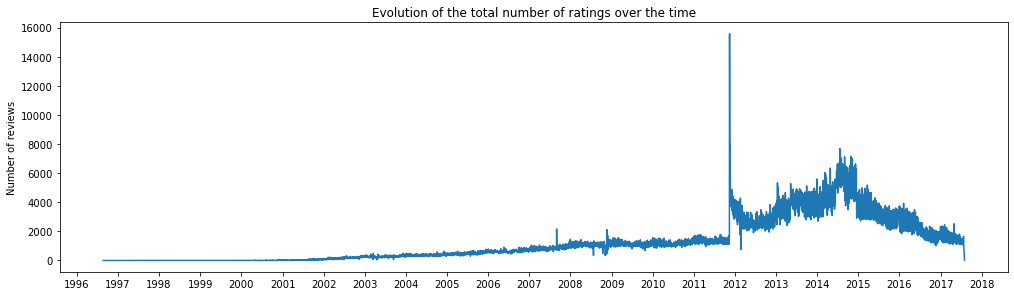

In [8]:
def plot_evolution(dates_count_serie, figsize, title) : 
    formatter = mdates.DateFormatter("%Y") # formatter of the date
    locator = mdates.YearLocator() # where to put the labels

    #plot the number of ratings per day
    fig = plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(locator)
    plt.plot(dates_count_serie.index, dates_count_serie.values)
    plt.tight_layout()
    plt.title(title)
    plt.ylabel('Number of reviews')
    plt.show()

#group the dates by month 
dates_count = dates_df.groupby('dates').size()
plot_evolution(dates_count, (14,4), 'Evolution of the total number of ratings over the time')


- First of all, we can see that we have less data before 2012. Hence, we will focus on studying data after this date in order to make more consistent analysis. 
- Then, we can observe of pick in summer 2014. That's a very good thing for us because we wanted to pick the Football World Cup as one of the event to study. The last event whose the date fits in the range of our dataset took place in summer 2014, which is when the number of reviews is the highest. However, we cannot make conclusions right now. Indeed, this peak might come from other reasons and we will check later in our analysis if other major phenomenas happened during this period. <br>

Now, let's zoom in and check this evolution after filteroug out the ratings before 2012. 

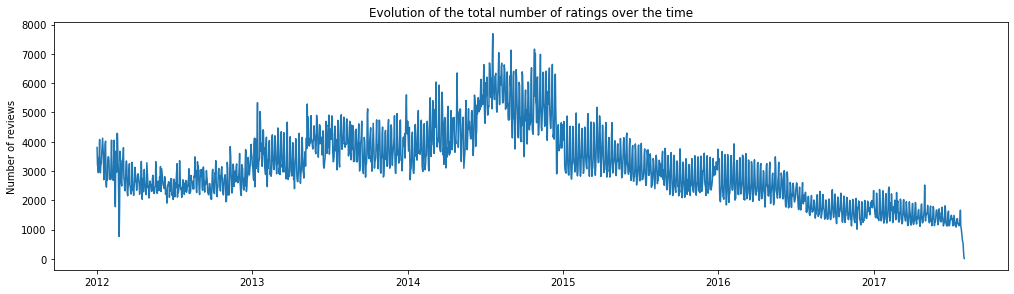

In [9]:
#group the dates by month 
dates_df2 = dates_df.loc[dates_df['dates']>'2012-01-01']
dates_count = dates_df2.groupby('dates').size()
plot_evolution(dates_count, (14,4), 'Evolution of the total number of ratings over the time')

## 2. Study the top 10 breweries

To go deeper into our analysis, we will visualize the evolution over time of the ratings of the top 10 breweries. As mentionned in the previous part, we will first focus on the World Cup 

In [10]:
#merge the number of ratings per brewery_name
ratings_per_brewery = final_df.groupby('brewery_name')['nbr_ratings'].sum()
ratings_per_brewery.sort_values(ascending=False, axis=0, inplace=True)

#take the top 10 breweries with the most ratings 
top_10_ratings_per_brewery = ratings_per_brewery.head(10)

#create a dataframe
top_10_ratings_per_brewery_df = pd.DataFrame({  'Name' : top_10_ratings_per_brewery.index,
                                                'Counts' : top_10_ratings_per_brewery.values})

top_10_ratings_per_brewery_df

,Name,Counts
0,Stone Brewing,161326
1,Sierra Nevada Brewing Co.,160772
2,Founders Brewing Company,146436
3,Boston Beer Company (Samuel Adams),145810
4,Dogfish Head Brewings & Eats,145222
5,Rogue Ales,113625
6,"Bell's Brewery, Inc.",108191
7,Lagunitas Brewing Company,106721
8,Goose Island Beer Co.,100999
9,3 Floyds Brewing Co.,90180


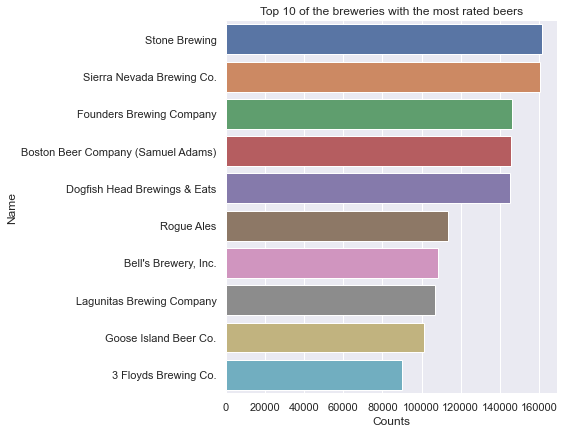

In [11]:
plt.figure(figsize=(8,6))

sns.set(style="darkgrid")

sns.set_color_codes("pastel")
sns.barplot(x="Counts", y="Name", data=top_10_ratings_per_brewery_df, label="Number of ratings")

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.title('Top 10 of the breweries with the most rated beers')
plt.show()

We want now to study the evolution of the number of ratings for each of the top 10 brewery. 

In [12]:
df = pd.concat([beer_advocate_df, rate_beer_df])
df['dates'] = df['dates'].str[1:-1].str.split(', ').apply(lambda x: [i.replace("'", "") for i in x]).values.tolist()

#Retrieve the names of the top10 breweries
name_breweries = top_10_ratings_per_brewery_df['Name'].values

#Store in a list a dataframe for each brewery
df_top10_brewery = []

for index, name in enumerate(name_breweries):
    tmp = [name]
    df_tmp = df[df['brewery_name'].isin(tmp)]
    dates_df2 = dates_df.loc[dates_df['dates']>'2012-01-01']

    df_top10_brewery.append(df_tmp)

In [ ]:
dates_top10_brewery = []

#For each brewery, we extract the dates
for index, df in enumerate(df_top10_brewery):
    dates_all_ratings = df.iloc[:,7].values
    dates_df = extract_dates(dates_all_ratings)
    dates_top10_brewery.append(dates_df)

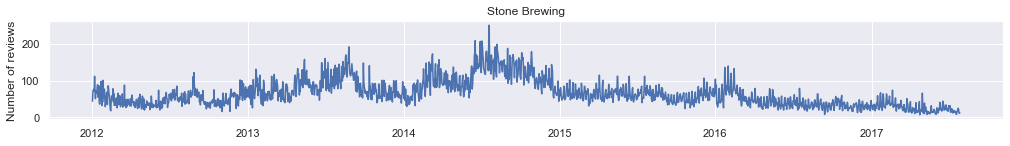

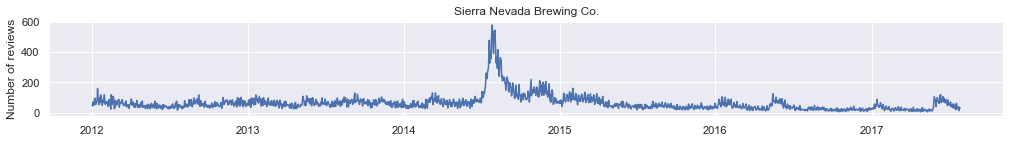

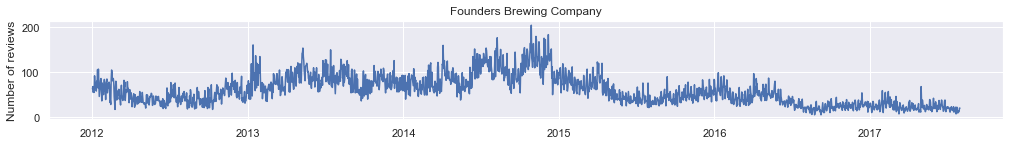

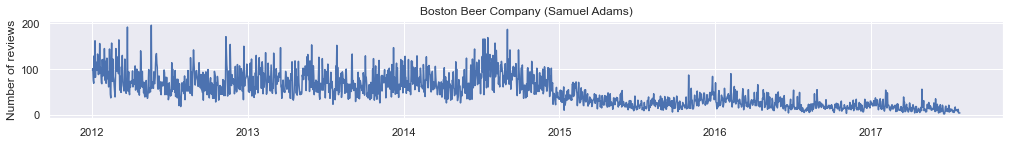

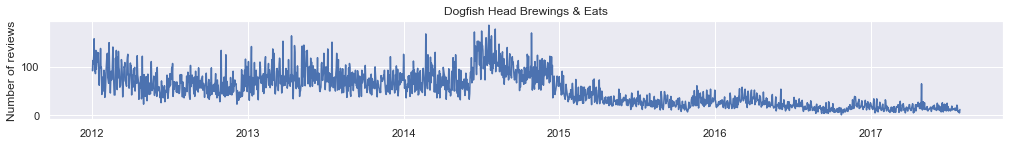

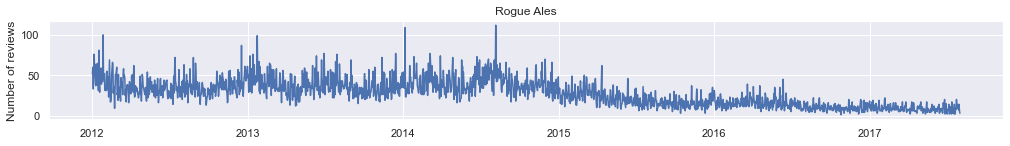

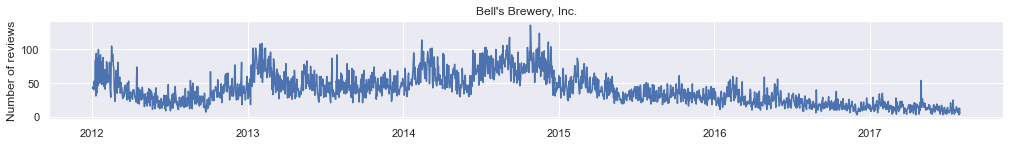

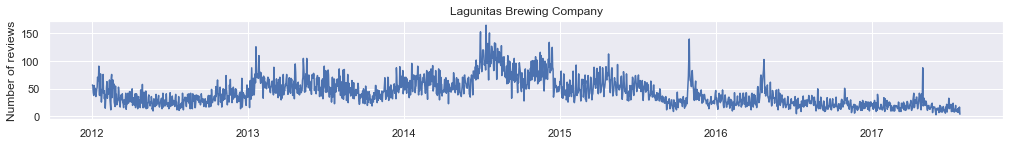

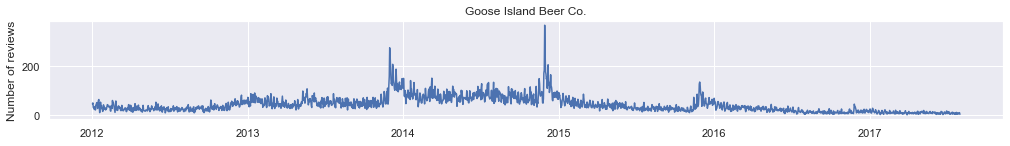

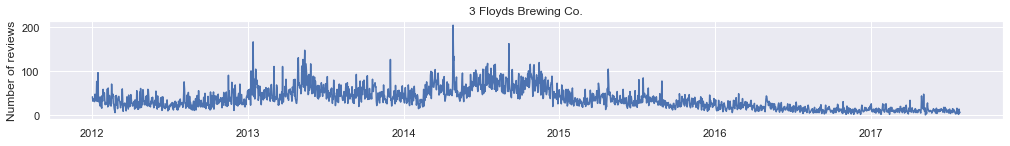

In [ ]:
for index, dates_df in enumerate(dates_top10_brewery):
    dates_df2 = dates_df[dates_df['dates']>'2012-01-01']
    dates_count = dates_df2.groupby('dates').size()
    plot_evolution(dates_count, (14, 2), name_breweries[index])


## 2. Study the top 10 beers

Now, we will focus on the most rated beers and make the same process.

In [ ]:
#merge the number of ratings per brewery_name
ratings_per_beers = final_df.groupby('beer_name')['nbr_ratings'].sum()
ratings_per_beers.sort_values(ascending=False, axis=0, inplace=True)

#take the top 10 breweries with the most ratings 
top_10_ratings_per_beer = ratings_per_beers.head(10)

#create a dataframe
top_10_ratings_per_beer_df = pd.DataFrame({  'Name' : top_10_ratings_per_beer.index,
                                                'Counts' : top_10_ratings_per_beer.values})

top_10_ratings_per_beer_df

,Name,Counts
0,Founders Breakfast Stout,16509
1,90 Minute IPA,15548
2,Arrogant Bastard Ale,14866
3,Pliny The Elder,14436
4,Two Hearted Ale,14305
5,St. Bernardus Abt 12,13997
6,Sculpin IPA,13835
7,Heady Topper,13426
8,Hopslam Ale,13026
9,Founders KBS (Kentucky Breakfast Stout),12599


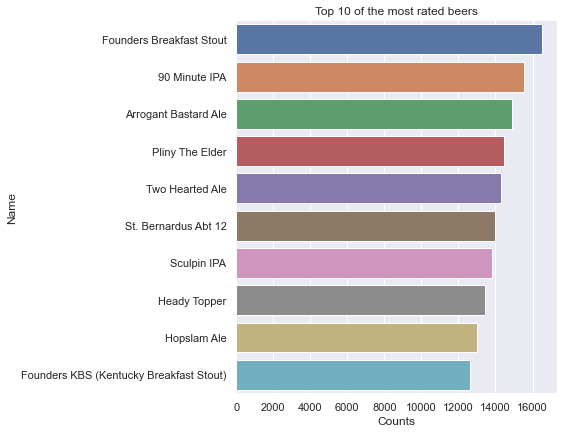

In [ ]:
plt.figure(figsize=(8,6))

sns.set(style="darkgrid")

sns.set_color_codes("pastel")
sns.barplot(x="Counts", y="Name", data=top_10_ratings_per_beer_df, label="Number of ratings")

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.title('Top 10 of the most rated beers')
plt.show()

In [ ]:
df = pd.concat([beer_advocate_df, rate_beer_df])
df['dates'] = df['dates'].str[1:-1].str.split(', ').apply(lambda x: [i.replace("'", "") for i in x]).values.tolist()

In [ ]:
#Retrieve the names of the top10 beers
name_beers = top_10_ratings_per_beer_df['Name'].values

#Store in a list a dataframe for each beer
df_top10_beer = []

for index, name in enumerate(name_beers):
    tmp = [name]
    df_tmp = df[df['beer_name'].isin(tmp)]
    dates_df2 = dates_df.loc[dates_df['dates']>'2012-01-01']

    df_top10_beer.append(df_tmp)

In [ ]:
dates_top10_beer = []

#For each beer, we extract the dates of the ratings
for index, df in enumerate(df_top10_beer):
    dates_all_ratings = df.iloc[:,7].values
    dates_df = extract_dates(dates_all_ratings)
    dates_top10_beer.append(dates_df)
    

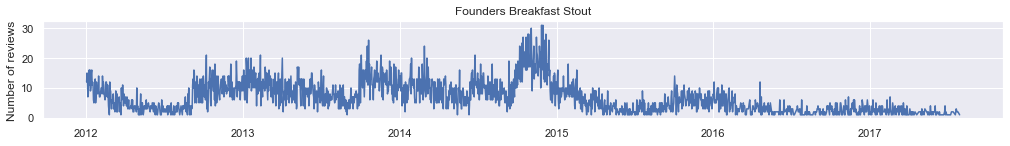

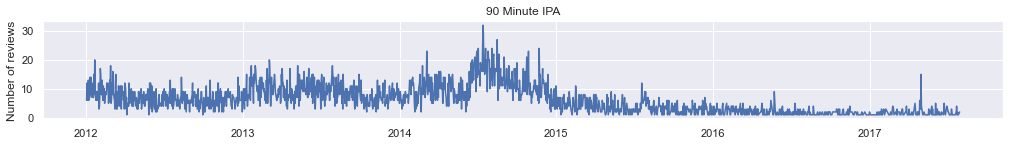

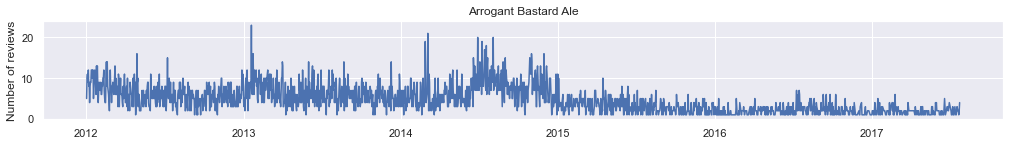

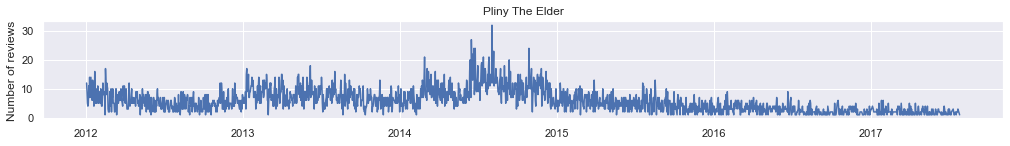

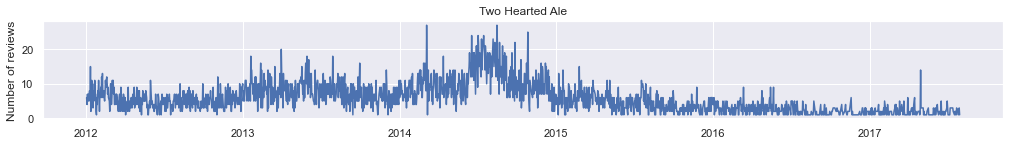

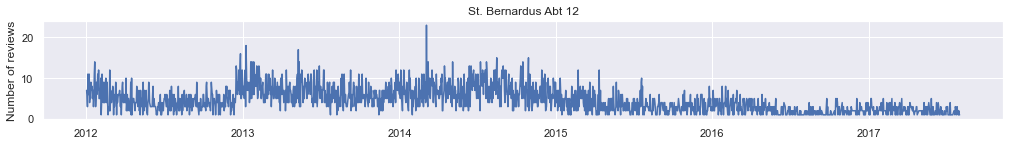

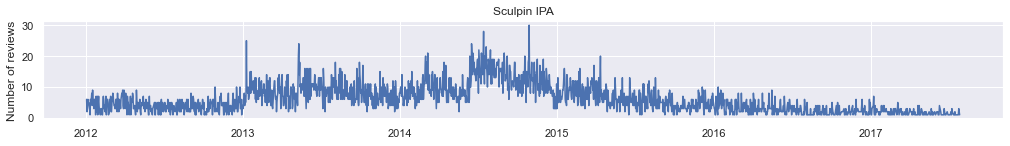

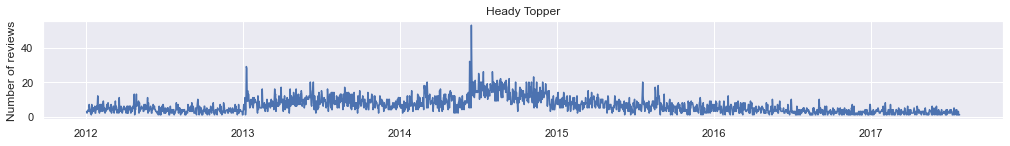

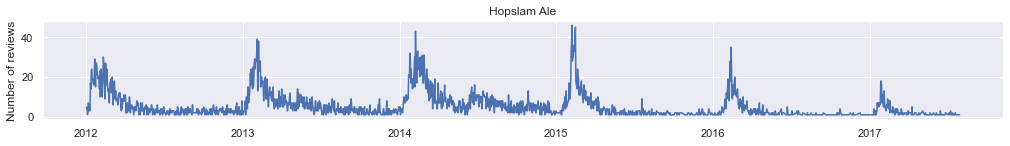

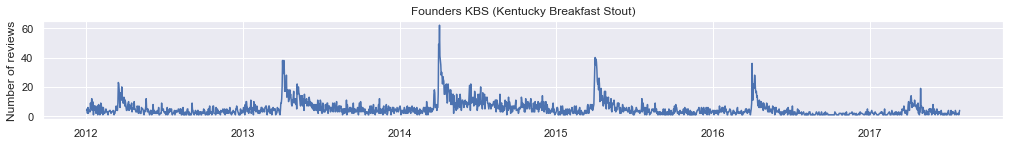

In [ ]:
for index, dates_df in enumerate(dates_top10_beer):
    dates_df2 = dates_df[dates_df['dates']>'2012-01-01']
    dates_count = dates_df2.groupby('dates').size()
    plot_evolution(dates_count, (14, 2), name_beers[index])

## 3. Study the top 10 styles

In [ ]:
#merge the number of ratings per brewery_name
ratings_per_style = final_df.groupby('style')['nbr_ratings'].sum()
ratings_per_style.sort_values(ascending=False, axis=0, inplace=True)

#take the top 10 breweries with the most ratings 
top_10_ratings_per_style = ratings_per_style.head(10)

#create a dataframe
top_10_ratings_per_style_df = pd.DataFrame({  'Style' : top_10_ratings_per_style.index,
                                                'Counts' : top_10_ratings_per_style.values})

top_10_ratings_per_style_df

,Style,Counts
0,American IPA,708740
1,American Double / Imperial IPA,597437
2,American Double / Imperial Stout,428182
3,American Pale Ale (APA),263424
4,India Pale Ale (IPA),255674
5,Imperial Stout,232476
6,Russian Imperial Stout,217916
7,Saison / Farmhouse Ale,194886
8,American Wild Ale,189392
9,American Porter,183762


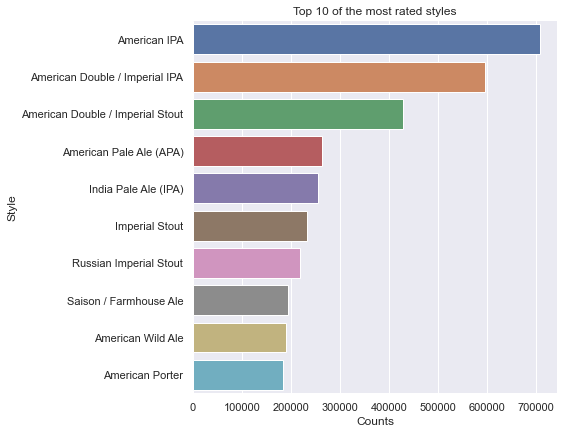

In [ ]:
plt.figure(figsize=(8,6))

sns.set(style="darkgrid")

sns.set_color_codes("pastel")
sns.barplot(x="Counts", y="Style", data=top_10_ratings_per_style_df, label="Number of ratings")

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.title('Top 10 of the most rated styles')
plt.show()

In [ ]:
df = pd.concat([beer_advocate_df, rate_beer_df])
df['dates'] = df['dates'].str[1:-1].str.split(', ').apply(lambda x: [i.replace("'", "") for i in x]).values.tolist()

In [ ]:
#Retrieve the names of the top10 styles
name_styles = top_10_ratings_per_style_df['Style'].values
#Store in a list a dataframe for each style
df_top10_style = []

for index, name in enumerate(name_styles):
    tmp = [name]
    df_tmp = df[df['style'].isin(tmp)]
    dates_df2 = dates_df.loc[dates_df['dates']>'2012-01-01']

    df_top10_style.append(df_tmp)

In [ ]:
dates_top10_style = []

#For each style, we extract the dates of the ratings
for index, df in enumerate(df_top10_style):
    dates_all_ratings = df.iloc[:,7].values
    dates_df = extract_dates(dates_all_ratings)
    dates_top10_style.append(dates_df)

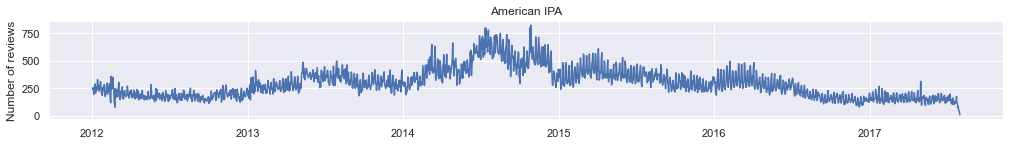

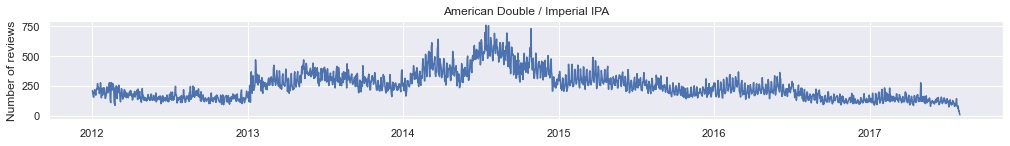

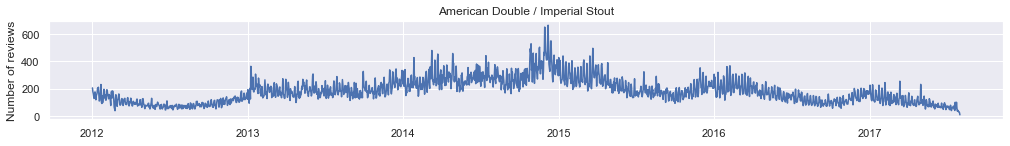

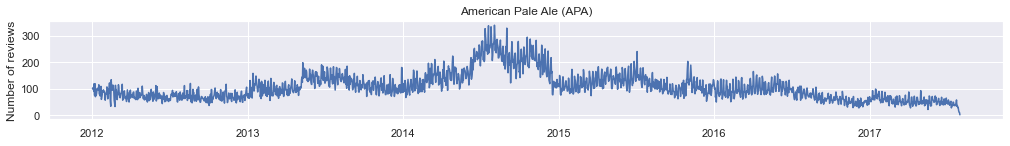

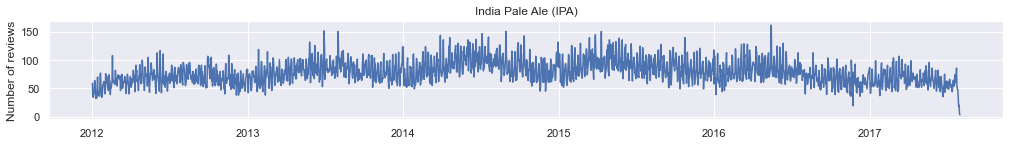

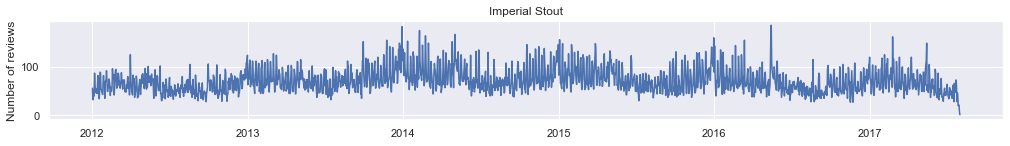

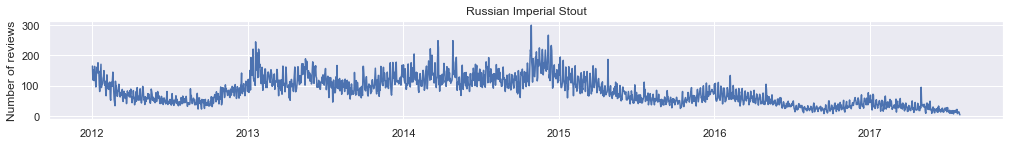

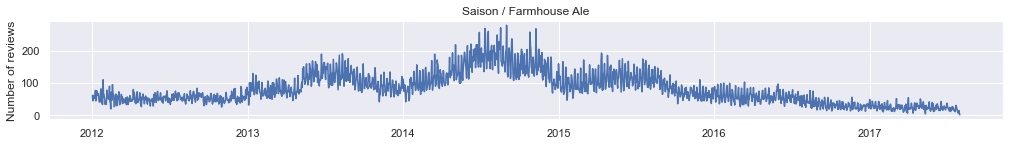

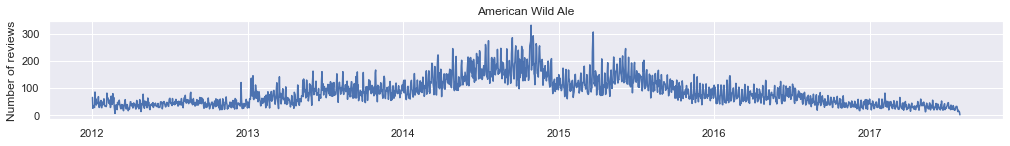

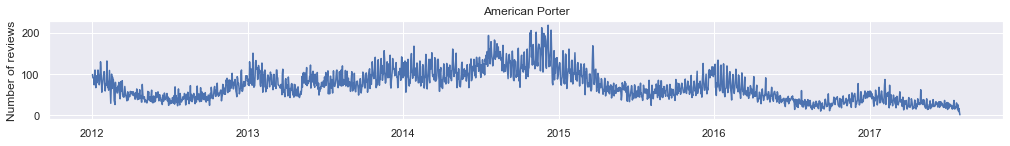

In [ ]:
for index, dates_df in enumerate(dates_top10_style):
    dates_df2 = dates_df[dates_df['dates']>'2012-01-01']
    dates_count = dates_df2.groupby('dates').size()
    plot_evolution(dates_count, (14, 2), name_styles[index])

## Focus on Euro and World cup Year

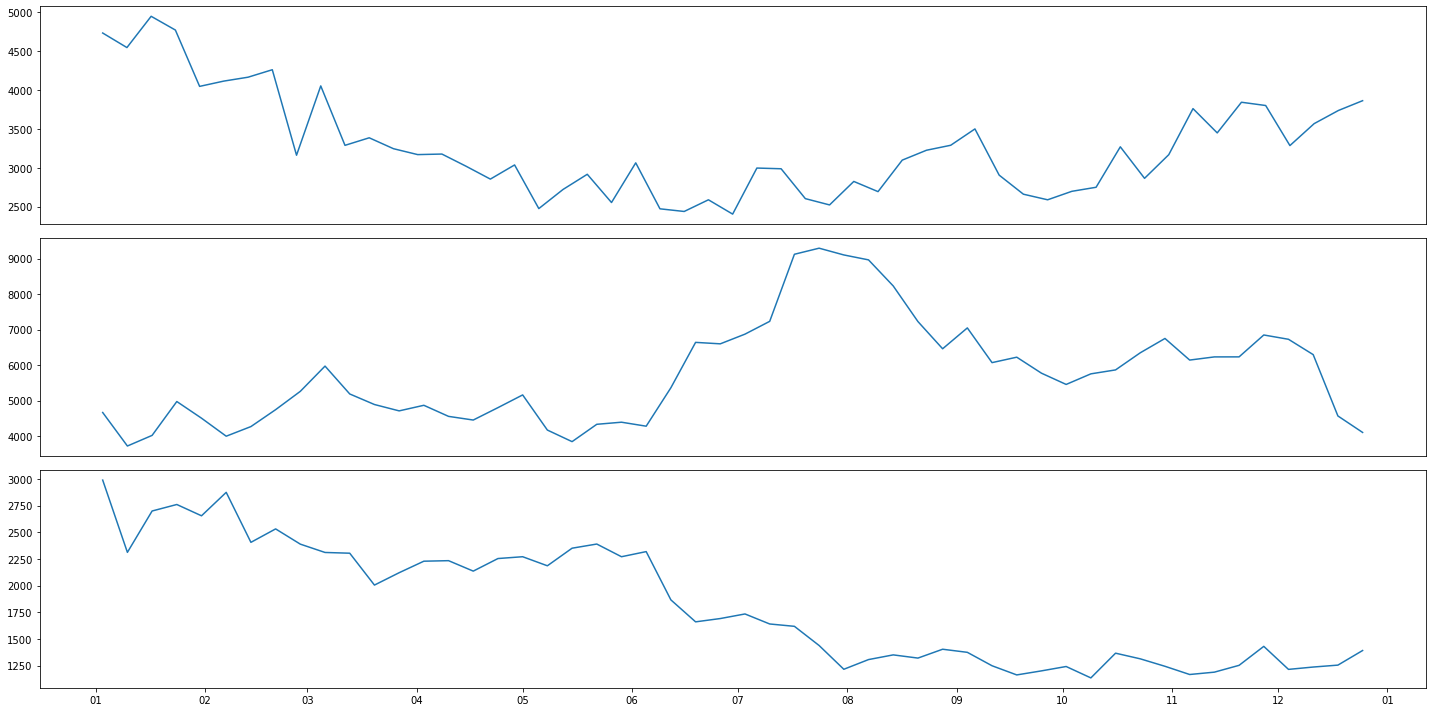

In [ ]:
# Take only the data from year 2012, 2014 and 2016 
# take only the year 2012

#round the data every three days 
dates_count = pd.DataFrame(dates_list, columns=['dates']).groupby(pd.Grouper(key='dates', freq='W')).size().reset_index(name='counts')

dates_count_2012 = dates_count[(dates_count['dates'] >= '2012-01-01') & (dates_count['dates'] < '2013-01-01')]
dates_count_2014 = dates_count[(dates_count['dates'] >= '2014-01-01') & (dates_count['dates'] < '2015-01-01')]
dates_count_2016 = dates_count[(dates_count['dates'] >= '2016-01-01') & (dates_count['dates'] < '2017-01-01')]

formatter = mdates.DateFormatter("%m") # formatter of the date
locator = mdates.MonthLocator() # where to put the labels

#plot 3 sub histograms for the 3 years

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,10))
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(locator)
ax1.plot(dates_count_2012['dates'], dates_count_2012['counts'])
ax2.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_major_locator(locator)
ax2.plot(dates_count_2014['dates'], dates_count_2014['counts'])
ax3.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_major_locator(locator)
ax3.plot(dates_count_2016['dates'], dates_count_2016['counts'])
plt.tight_layout()
plt.show()

We observe no increase of ratings during euro months but a big increase during World cups ones. Probably because of the nationalities of the reviewers.

## Focus on the top 10 Beers

We are going to focus on analysis the number of reviews of the first 10 breweries.

In [ ]:
#merge the number of ratings per brewery_name
ratings_per_beers = final_df.groupby('beer_name')['nbr_ratings'].sum().reset_index()
#take the top 10 breweries with the most ratings without the nbr_ratings column
top_10_ratings_per_beers = ratings_per_beers.sort_values(by='nbr_ratings', ascending=False).head(10).drop('nbr_ratings', axis=1)
print(top_10_ratings_per_beers)

                                     beer_name
7466                  Founders Breakfast Stout
349                              90 Minute IPA
1331                      Arrogant Bastard Ale
15475                          Pliny The Elder
20970                          Two Hearted Ale
18839                     St. Bernardus Abt 12
17565                              Sculpin IPA
9201                              Heady Topper
9991                               Hopslam Ale
7485   Founders KBS (Kentucky Breakfast Stout)


In [ ]:
#Take only the data from final_df that are in the top 10 breweries
top_10_beers = final_df[final_df['beer_name'].isin(top_10_ratings_per_beers['beer_name'])]
dates = pd.concat([top_10_beers['dates']], ignore_index=True)

#put the dates_list element in a single list
dates_list = [item for sublist in dates for item in sublist]

#For each element of the list, take only the day, month and year
dates_list = [i[0:10] for i in dates_list]

#change the type of the dates_list to datetime
dates_list = pd.to_datetime(dates_list)

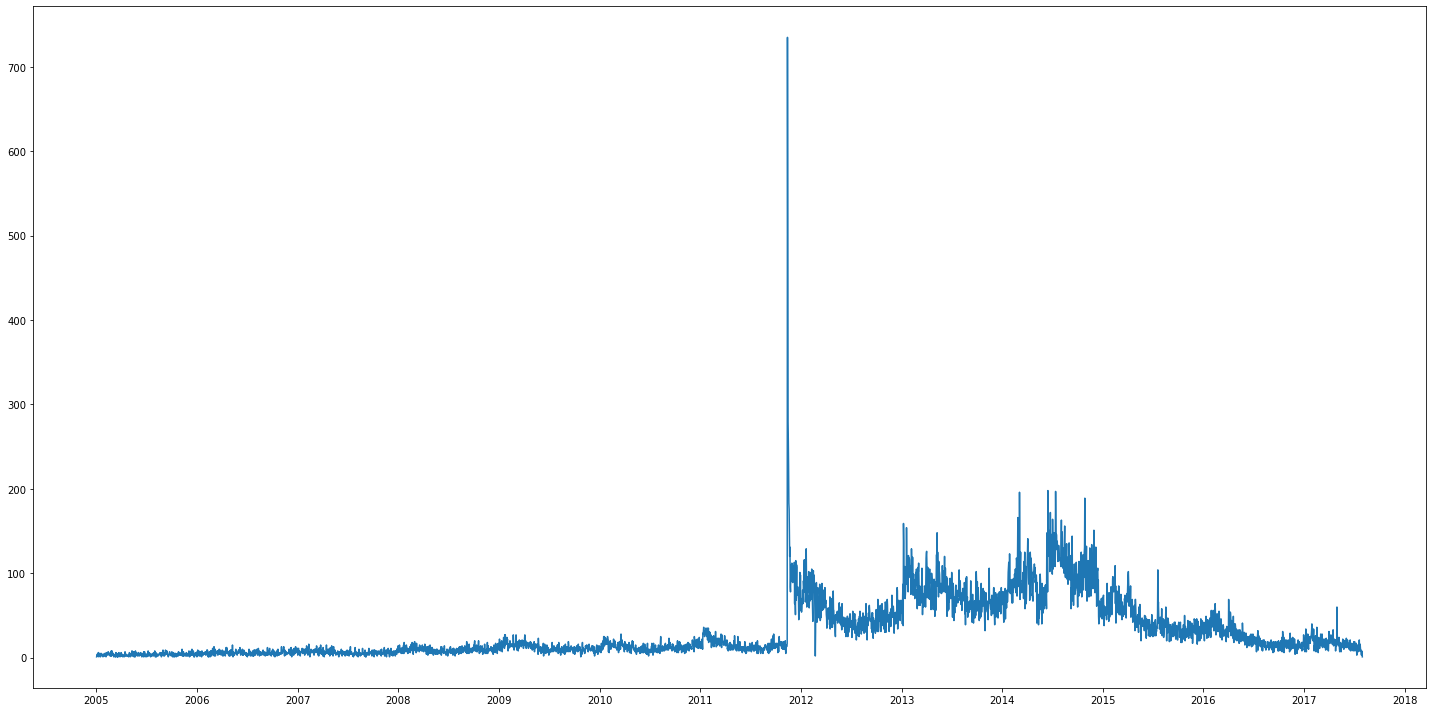

In [ ]:
#group the dates by day
dates_count = pd.DataFrame(dates_list, columns=['dates']).groupby('dates').size().reset_index(name='counts')

#take only the dates after 2005
dates_count = dates_count[dates_count['dates'] > '2005-01-01']

formatter = mdates.DateFormatter("%Y") # formatter of the date
locator = mdates.YearLocator() # where to put the labels

#plot the number of ratings per day
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)
plt.plot(dates_count['dates'], dates_count['counts'])
plt.tight_layout()
plt.show()

## Focus on Euro and World cup Year

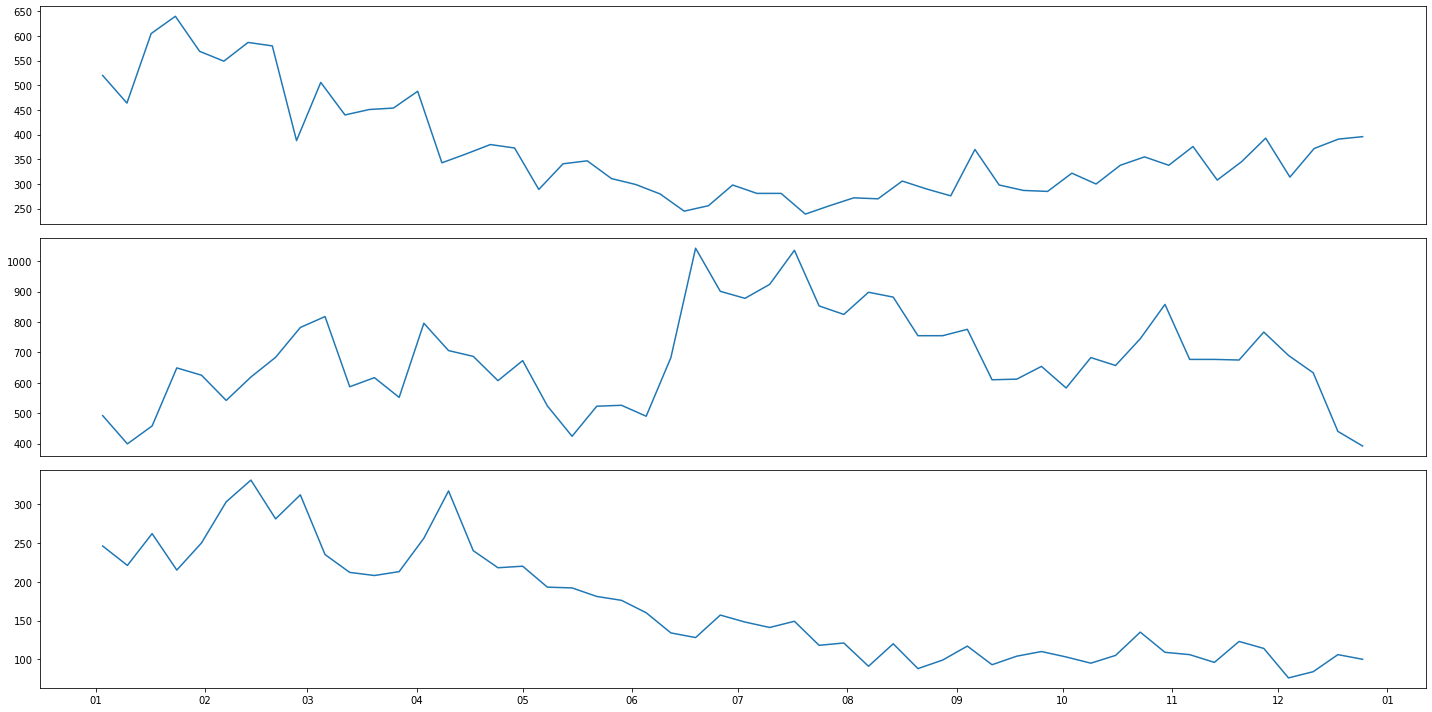

In [ ]:
# Take only the data from year 2012, 2014 and 2016 
# take only the year 2012

#round the data every three days 
dates_count = pd.DataFrame(dates_list, columns=['dates']).groupby(pd.Grouper(key='dates', freq='W')).size().reset_index(name='counts')

dates_count_2012 = dates_count[(dates_count['dates'] >= '2012-01-01') & (dates_count['dates'] < '2013-01-01')]
dates_count_2014 = dates_count[(dates_count['dates'] >= '2014-01-01') & (dates_count['dates'] < '2015-01-01')]
dates_count_2016 = dates_count[(dates_count['dates'] >= '2016-01-01') & (dates_count['dates'] < '2017-01-01')]

formatter = mdates.DateFormatter("%m") # formatter of the date
locator = mdates.MonthLocator() # where to put the labels

#plot 3 sub histograms for the 3 years

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,10))
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(locator)
ax1.plot(dates_count_2012['dates'], dates_count_2012['counts'])
ax2.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_major_locator(locator)
ax2.plot(dates_count_2014['dates'], dates_count_2014['counts'])
ax3.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_major_locator(locator)
ax3.plot(dates_count_2016['dates'], dates_count_2016['counts'])
plt.tight_layout()
plt.show()

We cannot say more than the analysis of the breweries. We will then focus on the days before, during and after the competition.

## Find other sport competitions

The strategy is to change our way of starting the analysis by looking at the locations of the users, to focus on event that are related to the main countries of the users.

In [ ]:
#import users.csv
rate_beer_users = pd.read_csv('data/RateBeer/users.csv')
beer_advocate_users = pd.read_csv('data/BeerAdvocate/users.csv')

#take only the nbr ratings column and the country column
rate_beer_users = rate_beer_users[['nbr_ratings', 'location']]
beer_advocate_users = beer_advocate_users[['nbr_ratings', 'location']]

#merge the two dataframes
df_countries = pd.concat([rate_beer_users, beer_advocate_users])

#take the top 20 location with the most ratings
locations_ratings = df_countries.groupby('location')['nbr_ratings'].sum().reset_index().sort_values(by='nbr_ratings', ascending=False)
print(locations_ratings.head(10))
print(locations_ratings[locations_ratings['location'] == 'Switzerland'])

NameError: name 'pd' is not defined

In [ ]:
#Replace all the location that start with United States to USA
df_countries['location'] = df_countries['location'].astype(str)
df_countries['location'] = df_countries['location'].apply(lambda x: 'USA' if x.startswith('United States') else x)

locations_ratings = df_countries.groupby('location')['nbr_ratings'].sum().reset_index().sort_values(by='nbr_ratings', ascending=False)

#new df with the top 10 locations all the others are in the other category
top_9_locations = locations_ratings.head(9)
top_10_locations = pd.concat([top_9_locations, pd.DataFrame({'location': ['other'], 'nbr_ratings': [locations_ratings['nbr_ratings'][9:].sum()]})])

plt.figure(figsize=(20,10))
plt.pie(top_10_locations['nbr_ratings'], labels=top_10_locations['location'], autopct='%1.1f%%')
plt.show()

We easily see that most of the ratings came from the United States, we will then change our mindset and analyze american events.

We will focus on these annually events :
- Super Bawl : begin of february 
- NBA finals : May - June
- MLB World Series : End of october - November